In [2]:
from theano.sandbox import cuda

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [3]:
%matplotlib inline
import utils; reload(utils)
from utils import *
from __future__ import division, print_function

Using Theano backend.


In [4]:
path = "data/dogscats/"
model_path = path + 'models/'
if not os.path.exists(model_path):
    os.mkdir(model_path)

In [5]:
batch_size = 64

In [6]:
model = vgg_ft(2)

In [7]:
# Loads all the weights saved to the specified h5py file.
model.load_weights('data/redux/results/ft2.h5')

In [10]:
layers = model.layers
print(type(layers))

<type 'list'>


In [11]:
# The last index in the list which is a convolutional network is retrieved.
last_conv_idx = [index for index, layer in enumerate(layers) if type(layer) is Convolution2D][-1]

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  0           zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [12]:
last_conv_idx

30

In [13]:
# The layers are of type list.
print(type(layers))
# The number of layers present in the model is 38
print(len(layers))
# The 30th layer is a convolution2D layer.
print(layers[last_conv_idx])

<type 'list'>
38


In [14]:
# print(layers[:last_conv_idx+1])
# The convolutional "section" of the model comprises of the first 31 indices
conv_layers = layers[:last_conv_idx+1]
# A convolution specific model is then generated, and it does not contain any dropouts.
conv_model = Sequential(conv_layers)
# Dense Layers(Fully Connected layers) comprise of every portion
# After the 31st index.
fc_layers = layers[last_conv_idx+1:]
# Te fully connected layers are also a list that can be iterated through to remove dropout.
# print(type(fc_layers))

In [14]:
batches = get_batches(path+'train', shuffle=False, batch_size=batch_size)
val_batches = get_batches(path+'valid', shuffle=False, batch_size=batch_size)

val_classes= val_batches.classes
print(type(val_classes))
trn_classes = batches.classes
val_labels = onehot(val_classes)
print(type(val_labels))
trn_labels = onehot(trn_classes)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [15]:
print(len(val_classes))
print(len(trn_classes))
print(val_labels[:2])
print(trn_labels[-2:])

2000
23000
[[ 1.  0.]
 [ 1.  0.]]
[[ 0.  1.]
 [ 0.  1.]]


In [16]:
val_features = conv_model.predict_generator(val_batches, val_batches.nb_sample)
print(type(val_features))

<type 'numpy.ndarray'>


In [17]:
# the numpy array retrieved via predict_generator is of length 2000
# and each index of the array holds the prediction of cats vs dogs as a 512 dimensional tensor and holds 14 X 14 px images.
print(len(val_features))
print(len(val_features[2]))
# print(val_features[2])
print(val_labels[2])

2000
512
[ 1.  0.]


In [18]:
trn_features = conv_model.predict_generator(batches, batches.nb_sample)

In [19]:
save_array(model_path + 'train_convlayer_features.bc', trn_features)
save_array(model_path + 'valid_convlayer_features.bc', val_features)

In [15]:
# Models have been previously saved and now loaded
trn_features = load_array(model_path+'train_convlayer_features.bc')
val_features = load_array(model_path+'valid_convlayer_features.bc')

In [16]:
# The shape of the final convolutional layer.
print(type(trn_features))
trn_features.shape

<type 'numpy.ndarray'>


(23000, 512, 14, 14)

In [17]:
# Copy the weights from the pre-trained model.
# NB: Since we're removing dropout, we want to half the weights
def proc_wgts(layer):
    return [o/2 for o in layer.get_weights()]

In [18]:
# Good choice for RNN's, but it is used for CNN? why??
opt = RMSprop(lr=0.00001, rho=0.7)
print(l1)

<function l1 at 0x7f26efb6e320>


In [19]:
# ?? zip()
print(conv_layers[-1])
model.summary()
print(conv_layers[-1].output_shape[1:])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  0           zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [20]:
print(type(model.layers))
print(type(fc_layers))

print("MODEL LAYERS",model.layers)
print("#############################################")
print(len(model.layers))
print("#############################################")
print("#############################################")
print("Fully_Connected Layers",fc_layers)
print("#############################################")
print(len(fc_layers))

print("#############################################")
print("#############################################")
print("#############################################")
print("#############################################")

print(zip(model.layers, fc_layers))

<type 'list'>
<type 'list'>
MODEL LAYERS [<keras.layers.core.Lambda object at 0x7f26efa8e410>, <keras.layers.convolutional.ZeroPadding2D object at 0x7f26ef9d8690>, <keras.layers.convolutional.Convolution2D object at 0x7f26ef9a2450>, <keras.layers.convolutional.ZeroPadding2D object at 0x7f26ef72f110>, <keras.layers.convolutional.Convolution2D object at 0x7f26ef73b410>, <keras.layers.pooling.MaxPooling2D object at 0x7f26ef9d8650>, <keras.layers.convolutional.ZeroPadding2D object at 0x7f26ef6fcc10>, <keras.layers.convolutional.Convolution2D object at 0x7f26ef68f690>, <keras.layers.convolutional.ZeroPadding2D object at 0x7f26ef6966d0>, <keras.layers.convolutional.Convolution2D object at 0x7f26ef647810>, <keras.layers.pooling.MaxPooling2D object at 0x7f26ef6fcbd0>, <keras.layers.convolutional.ZeroPadding2D object at 0x7f26ef671a10>, <keras.layers.convolutional.Convolution2D object at 0x7f26ef6038d0>, <keras.layers.convolutional.ZeroPadding2D object at 0x7f26ef65a7d0>, <keras.layers.convolut

In [26]:
# Below is the model created to remove the dropout layers
def get_fc_model():
    model = Sequential([
        # The MaxPooling2D's input shape comprise of the last two values of the output shape of the conv_layers[-1]
        # which is (512,14,14)
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.),
        Dense(4096, activation='relu'),
        Dropout(0.),
        Dense(2, activation='softmax')
        ])

    for l1,l2 in zip(model.layers, fc_layers):
        print("l1",l1)
        print("l2",l2)
        l1.set_weights(proc_wgts(l2))

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [27]:
fc_model = get_fc_model()

l1 <keras.layers.pooling.MaxPooling2D object at 0x7f3ef6523d50>
l2 <keras.layers.pooling.MaxPooling2D object at 0x7f3efa4b7190>
l1 <keras.layers.core.Flatten object at 0x7f3ef6523f10>
l2 <keras.layers.core.Flatten object at 0x7f3efa44a850>
l1 <keras.layers.core.Dense object at 0x7f3ef6523fd0>
l2 <keras.layers.core.Dense object at 0x7f3efa3c3f10>
l1 <keras.layers.core.Dropout object at 0x7f3ef0d2b110>
l2 <keras.layers.core.Dropout object at 0x7f3efa358210>
l1 <keras.layers.core.Dense object at 0x7f3ef6523d10>
l2 <keras.layers.core.Dense object at 0x7f3efa33eb50>
l1 <keras.layers.core.Dropout object at 0x7f3ef0d20410>
l2 <keras.layers.core.Dropout object at 0x7f3efa337c90>
l1 <keras.layers.core.Dense object at 0x7f3ef0d20610>
l2 <keras.layers.core.Dense object at 0x7f3ef6f6bc50>


In [29]:
# Massively overfitting at this point, but the calculation is super quick
# Because we are only dealing with dense layers, not the convolutional layers.
fc_model.fit(trn_features, trn_labels, nb_epoch=5, 
             batch_size=batch_size, validation_data=(val_features, val_labels))

Train on 23000 samples, validate on 2000 samples
Epoch 1/5
23000/23000 [==============================] - 34s - loss: 0.0218 - acc: 0.9986 - val_loss: 0.1166 - val_acc: 0.9875
Epoch 2/5
23000/23000 [==============================] - 34s - loss: 0.0217 - acc: 0.9987 - val_loss: 0.1077 - val_acc: 0.9890
Epoch 3/5
23000/23000 [==============================] - 33s - loss: 0.0210 - acc: 0.9987 - val_loss: 0.1089 - val_acc: 0.9880
Epoch 4/5
23000/23000 [==============================] - 33s - loss: 0.0210 - acc: 0.9987 - val_loss: 0.1090 - val_acc: 0.9875
Epoch 5/5
23000/23000 [==============================] - 33s - loss: 0.0210 - acc: 0.9987 - val_loss: 0.1084 - val_acc: 0.9885


In [30]:
fc_model.save_weights(model_path+'no_dropout.h5')

In [31]:
fc_model.load_weights(model_path+'no_dropout.h5')

### Reducing Overfitting

In [21]:
# dim_ordering='tf' uses tensorflow dimension ordering,
#   which is the same order as matplotlib uses for display.
# Therefore when just using for display purposes, this is more convenient
gen = image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True, dim_ordering='tf')

batch_augmentation_mnist.ipynb  understanding-convolutions.ipynb  vgg16bn.pyc
data/                           utils.py                          vgg16.py
dogs-cats-redux.ipynb           utils.pyc                         vgg16.pyc
imdb-preds.ipynb                vgg16bn.py


In [40]:
# Create a 'batch' of a single image
img = np.expand_dims(ndimage.imread('data/dogscats/sample/train/cats/cat.10171.jpg'),0)
# Request the generator to create batches from this image
aug_iter = gen.flow(img)

In [41]:
# Get eight examples of these augmented images
aug_imgs = [next(aug_iter)[0].astype(np.uint8) for i in range(8)]

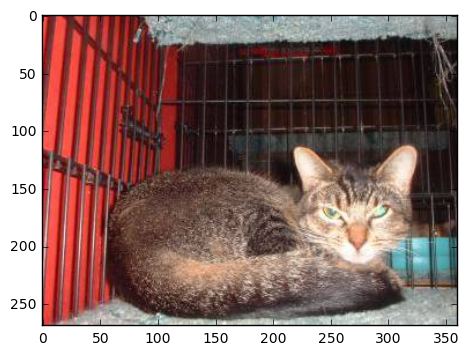

In [42]:
# The original
plt.imshow(img[0])

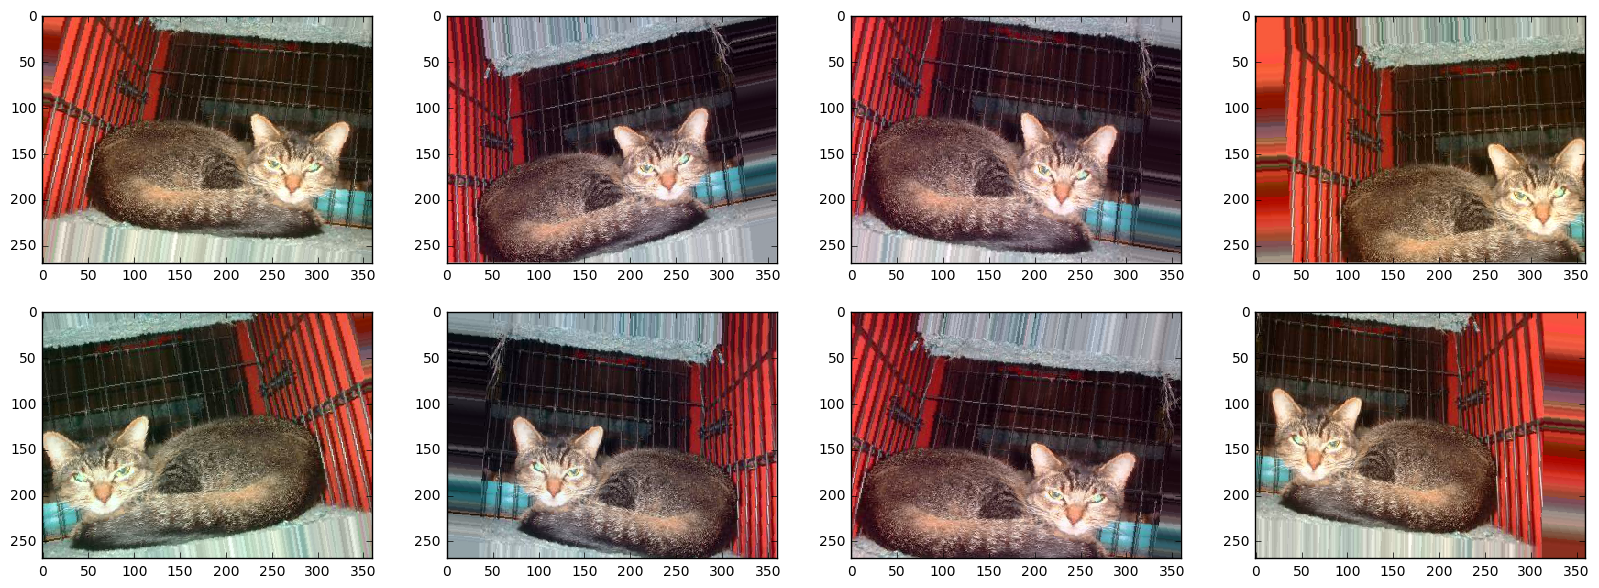

In [43]:
# Augmented data
plots(aug_imgs, (20,7), 2)

In [22]:
# Ensure that we return to theano dimension ordering
K.set_image_dim_ordering('th')

In [23]:
gen = image.ImageDataGenerator(rotation_range=15, width_shift_range=0.1, 
                               height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True)

In [24]:
batches = get_batches(path+'train', gen, batch_size=batch_size)
# NB: We don't want to augment or shuffle the validation set
val_batches = get_batches(path+'valid', shuffle=False, batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [27]:
fc_model = get_fc_model()

l1 <keras.layers.pooling.MaxPooling2D object at 0x7f26eb410490>
l2 <keras.layers.pooling.MaxPooling2D object at 0x7f26ef500410>
l1 <keras.layers.core.Flatten object at 0x7f26eb410d90>
l2 <keras.layers.core.Flatten object at 0x7f26ef494c10>
l1 <keras.layers.core.Dense object at 0x7f26eb4320d0>
l2 <keras.layers.core.Dense object at 0x7f26ef4161d0>
l1 <keras.layers.core.Dropout object at 0x7f26eb4107d0>
l2 <keras.layers.core.Dropout object at 0x7f26ef420490>
l1 <keras.layers.core.Dense object at 0x7f26ebf4a790>
l2 <keras.layers.core.Dense object at 0x7f26ef3cf910>
l1 <keras.layers.core.Dropout object at 0x7f273a3d46d0>
l2 <keras.layers.core.Dropout object at 0x7f26ef38eed0>
l1 <keras.layers.core.Dense object at 0x7f26eb45d890>
l2 <keras.layers.core.Dense object at 0x7f26ec030e90>


In [28]:
for layer in conv_model.layers: layer.trainable = False
# Look how easy it is to connect two models together!
conv_model.add(fc_model)

In [29]:
conv_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Had a nice fit in epoch 2/8
conv_model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=8, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

Epoch 1/8
23000/23000 [==============================] - 665s - loss: 0.1461 - acc: 0.9779 - val_loss: 0.1071 - val_acc: 0.9850
Epoch 2/8
23000/23000 [==============================] - 664s - loss: 0.0723 - acc: 0.9864 - val_loss: 0.0762 - val_acc: 0.9860
Epoch 3/8
23000/23000 [==============================] - 664s - loss: 0.0533 - acc: 0.9899 - val_loss: 0.1052 - val_acc: 0.9850
Epoch 4/8
23000/23000 [==============================] - 664s - loss: 0.0465 - acc: 0.9916 - val_loss: 0.1067 - val_acc: 0.9870
Epoch 5/8
23000/23000 [==============================] - 665s - loss: 0.0413 - acc: 0.9926 - val_loss: 0.1175 - val_acc: 0.9845
Epoch 6/8
23000/23000 [==============================] - 665s - loss: 0.0363 - acc: 0.9935 - val_loss: 0.1078 - val_acc: 0.9845
Epoch 7/8
23000/23000 [==============================] - 664s - loss: 0.0326 - acc: 0.9947 - val_loss: 0.1275 - val_acc: 0.9875
Epoch 8/8
23000/23000 [==============================] - 664s - loss: 0.0366 - acc: 0.9940 - val_loss: 0